# Testing the LTV

## Background on the LTV

## Calculation of Labor Content in Monetary Terms

### Algorithms

### Iterative Labor Calculation

In [1129]:
import numpy as np 
import pandas as pd

def iterative_labor_calculation(A,O,V,n_iterations):
    """iterative_labor_calculation 
    
    Parameters
    ..........
    
    A : matrix of industry coefficients 
        a 1-dimensional mxn numpy array (matrix)
    
    V: variable capital
        a 1-dimensional mx1 numpy array (vector)
        
    O : gross-output 
        a 1-dimensional mx1 numpy array (vector)
        
    n_iterations: cycles of production
        a integer indicating number of iterations 
        
    Returns
    ..........
    
    O1 : labor content in pounds or dollars  
        a 1- dimensional array mx1 (vector)

    """
    
    n=O.shape
    ## initialize array of ones 
    L=np.ones(n)
    
    #L=L[:,np.newaxis]
    
    for i in range(n_iterations): 
            O1= np.sum(A * L,axis=0) + V ## multiply vector L row by row with A, then sum going down 
            L= O1/O ## divide the result of operation above with O 
    
    return O1

### Random Labor Calculation

In [791]:
def gauss_sample_labor_calculation(A,O,V,n_iterations):
    """iterative_labor_calculation 
    
    Parameters
    ..........
    
    A : matrix of industry coefficients 
        a 1-dimensional mxn numpy array (matrix)
    
    V: variable capital
        a 1-dimensional mx1 numpy array (vector)
        
    O : gross-output 
        a 1-dimensional mx1 numpy array (vector)
        
    n_iterations: cycles of production
        a integer indicating number of iterations 
        
    Returns
    ..........
    
    O1 : labor content in pounds or dollars  
        a 1- dimensional array mx1 (vector)

    """
    
    n=O.shape
    ## initialize array of ones 
    L=np.random.randn(n) +1 
    
    L=L[:,np.newaxis]
    ## transpose of A 

    for i in range(n_iterations): 
            O1= np.sum(A * L,axis=0) + V ## multiply vector L row by row with A, then sum going down  
            L= O1/O ## divide the result of operation above with O 
    
    return O1

## Testing the Labor Content Effect 

### Artificial Economy 

### Real Economy : UK 1968


In [1112]:
## uk data io 

file = '/Users/djamillakhdarhamina/Desktop/uk-1968.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dataset 
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication,"Community, social & personal services"
"Agriculture, forestry & fishing",533.0,0.0,1266.0,132.0,13.0,7.0,12.0,3.0,0.0,26.0,...,0.0,0.0,1.0,1.0,0.0,0.0,12.0,9.0,0.0,0.0
Mining & quarrying,7.0,5.0,11.0,11.0,1.0,16.0,74.0,1.0,573.0,3.0,...,1.0,0.0,1.0,397.0,92.0,0.0,1.0,2.0,0.0,0.0
"Food, beverages & tobacco",452.0,0.0,996.0,3.0,0.0,5.0,49.0,8.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,34.0,19.0,0.0,0.0
"Textiles, apparel & leather",16.0,4.0,3.0,1261.0,41.0,16.0,26.0,0.0,0.0,33.0,...,2.0,3.0,16.0,2.0,5.0,89.0,54.0,12.0,2.0,3.0
Wood products & furniture,21.0,13.0,18.0,5.0,328.0,6.0,7.0,0.0,0.0,3.0,...,1.0,0.0,5.0,1.0,303.0,24.0,10.0,4.0,2.0,7.0
"Paper, paper products & printing",4.0,4.0,181.0,38.0,13.0,690.0,104.0,10.0,1.0,14.0,...,4.0,6.0,20.0,8.0,27.0,247.0,9.0,15.0,9.0,63.0
Industrial chemicals,159.0,16.0,66.0,304.0,23.0,97.0,802.0,36.0,48.0,182.0,...,2.0,5.0,41.0,10.0,57.0,35.0,14.0,11.0,0.0,13.0
Drugs & medicines,10.0,0.0,26.0,0.0,0.0,0.0,3.0,41.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Petroleum & coal products,38.0,18.0,37.0,18.0,6.0,19.0,133.0,3.0,112.0,6.0,...,5.0,2.0,4.0,123.0,37.0,31.0,12.0,76.0,1.0,5.0
Rubber & plastic products,9.0,6.0,30.0,36.0,12.0,7.0,39.0,5.0,2.0,31.0,...,9.0,6.0,10.0,3.0,49.0,55.0,25.0,32.0,1.0,4.0


In [1121]:
A=data.loc[:'Communication',:'Communication']
O=data.loc['Gross output',:'Communication']
V=data.loc['Compensation of employees',:'Communication']

In [1130]:
sol=iterative_labor_calculation(A,O,V,4)
sol

Agriculture, forestry & fishing        1195.004230
Mining & quarrying                      827.282218
Food, beverages & tobacco              2967.022878
Textiles, apparel & leather            2582.137772
Wood products & furniture               715.279832
Paper, paper products & printing       1456.690924
Industrial chemicals                   1514.012085
Drugs & medicines                       130.259166
Petroleum & coal products               817.199078
Rubber & plastic products               531.972243
Non-metallic mineral products           713.254893
Iron & steel                           1565.479940
Non-ferrous metals                      696.268619
Metal products                         1677.860745
Non-electrical machinery               2116.558905
Office & computing machinery             74.939738
Electrical apparatus, nec              1094.837244
Radio, TV & communication equipment     731.597390
Shipbuilding & repairing                411.594123
Other transport                

In [1132]:
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
correlation_xy

0.9775736764543174

In [1131]:
r_squared = correlation_xy**2
r_squared

0.9556502928964103

### Real Economy : UK 1979

In [957]:
## uk data io 

file = '/Users/djamillakhdarhamina/Desktop/io2.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dataset 
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication,"Community, social & personal services"
"Agriculture, forestry & fishing",2010,0,7726,243,71,4,14,3,0,64,...,0,0,2,0,6,13,242,7,0,0
Mining & quarrying,11,493,28,14,3,49,168,0,6323,6,...,2,0,0,3297,191,0,20,14,0,0
"Food, beverages & tobacco",2009,3,4878,165,7,25,249,40,9,2,...,0,0,10,3,13,401,1873,59,1,4
"Textiles, apparel & leather",59,6,53,3286,167,56,52,25,2,107,...,6,14,32,13,130,607,260,28,12,61
Wood products & furniture,20,39,50,15,1171,31,40,7,2,32,...,2,12,21,18,973,129,12,40,18,34
"Paper, paper products & printing",79,15,863,163,81,2900,321,64,22,119,...,19,29,166,83,189,1073,18,611,73,394
Industrial chemicals,634,79,226,760,89,342,4192,174,100,1166,...,33,44,106,76,347,222,17,51,8,76
Drugs & medicines,0,0,120,0,0,0,7,320,0,0,...,0,0,0,0,0,0,0,3,0,95
Petroleum & coal products,242,57,198,119,37,110,1147,27,360,48,...,30,5,9,576,81,459,42,1706,23,24
Rubber & plastic products,63,49,285,125,125,102,204,51,8,309,...,23,68,73,62,208,444,45,250,33,27


In [958]:
A=data.loc[:'Communication',:'Communication']
O=data.loc['Gross output',:'Communication']
V=data.loc['Compensation of employees',:'Communication']

In [959]:
sol=iterative_labor_calculation(A,O,V,5)
sol

Agriculture, forestry & fishing         4063.050292
Mining & quarrying                      2970.694327
Food, beverages & tobacco              14023.740690
Textiles, apparel & leather             7442.055906
Wood products & furniture               2944.929072
Paper, paper products & printing        6232.715731
Industrial chemicals                    7320.791414
Drugs & medicines                        803.918722
Petroleum & coal products               4236.715877
Rubber & plastic products               3211.839277
Non-metallic mineral products           3298.344101
Iron & steel                            8738.476117
Non-ferrous metals                      1774.669860
Metal products                          4405.332191
Non-electrical machinery                9542.272942
Office & computing machinery             586.894521
Electrical apparatus, nec               4106.674432
Radio, TV & communication equipment     3265.085446
Shipbuilding & repairing                1485.613302
Other transp

In [960]:
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9400031508663771

### Real Economy: UK-1984

In [1036]:
file = '../data/UK-1984.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dtaset 
data

,Agriculture,Forestry and fishing,Coal extraction etc,Extraction of oil and gas,Mineral oil processing,Electricity etc,Gas,Water,Extraction of metal ores etc,Iron and steel etc,...,Public administration etc,Adjusts,Total,Consumers' expenditure,GGFC,GDFCF,Stocks,Exports,TOTAL Final Demand,TOTAL
Product,,,,,,,,,,,,,,,,,,,,,
Agriculture,2296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10985.0,1990.0,113.0,0.0,24.0,1262.0,3390.0,14375.0
Forestry and fishing,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,407.0,228.0,11.0,0.0,2.0,97.0,337.0,744.0
Coal extraction etc,2.0,0.0,87.0,0.0,0.0,1147.0,1.0,1.0,0.0,345.0,...,0.0,0.0,1972.0,415.0,98.0,0.0,-742.0,87.0,-142.0,1830.0
Extraction of oil and gas,0.0,0.0,0.0,862.0,7135.0,0.0,1936.0,0.0,0.0,0.0,...,0.0,0.0,9935.0,0.0,0.0,0.0,0.0,12574.0,12574.0,22509.0
Mineral oil processing,293.0,22.0,15.0,0.0,1072.0,3233.0,10.0,3.0,3.0,15.0,...,0.0,0.0,8752.0,1706.0,1062.0,0.0,-272.0,3643.0,6140.0,14892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sales by final demand,9.0,6.0,9.0,12.0,12.0,1.0,5.0,2.0,1.0,385.0,...,0.0,0.0,1838.0,3762.0,-4591.0,-2498.0,-1.0,1490.0,-1838.0,0.0
Taxes on expend. Less subsidies,-654.0,15.0,-1800.0,-10.0,30.0,344.0,168.0,107.0,12.0,141.0,...,0.0,0.0,7274.0,31011.0,3697.0,2218.0,7.0,776.0,37709.0,44983.0
Income from employment,1385.0,231.0,1333.0,486.0,292.0,2215.0,1214.0,524.0,71.0,1364.0,...,46046.0,0.0,180053.0,0.0,0.0,0.0,0.0,0.0,0.0,180053.0


In [1037]:
A=data.loc[:'Other services',:'Other services']
O=data.loc['Total inputs',:'Other services'] 
V=data.loc['Income from employment',:'Other services'] 

In [1038]:
sol=iterative_labor_calculation(A,O,V,3)

In [1039]:
correlation_matrix = np.corrcoef(O,sol)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.8833003228121333

In [1040]:
sol=random_labor_calculation(A,O,V,4)
sol

Product
Agriculture                   5864.173680
Forestry and fishing           523.456379
Coal extraction etc           5049.660718
Extraction of oil and gas     1423.815186
Mineral oil processing        1417.357917
                                 ...     
Telecommunications            5597.982493
Banking and finance           7880.182894
Insurance                     3419.499595
Business services etc        35778.798158
Other services                9600.872687
Length: 101, dtype: float64

In [1041]:
correlation_matrix = np.corrcoef(O,sol)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.6263565468969445

### Real Economy: UK-1990

In [1042]:
## uk data io 

file = '/Users/djamillakhdarhamina/Desktop/io.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dataset 
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Statistical discrepancy,Total,Private domestic consumption,Government consumption,Total GFCF,Changes in Stocks,Exports of goods and services,Total final demand,Imports of goods and services,Gross output
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,0,15459,5872,49,90,113,1830,7955,-3703,19711
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,0,15517,719,34,18,-256,7849,8364,-7709,16172
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,0,20449,28655,410,114,129,7122,36431,-11213,45667
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,0,10009,11039,242,43,-16,6309,17616,-12313,15313
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,0,7293,3516,436,1058,0,517,5527,-3336,9484
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,0,25361,4763,1067,76,65,3049,9021,-6691,27691
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,0,17556,4404,170,229,-187,12643,17259,-10961,23853
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,0,4221,883,31,81,-23,2697,3670,-1631,6260
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,0,5918,3833,240,96,30,3458,7656,-3540,10034
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,0,11929,1207,207,205,-41,2728,4305,-3914,12320


In [1043]:
## A is the matrix of coefficients , the columns and rows included are Agricultre 
A = data.loc[:'Communication', :
             'Communication']

In [1044]:
## variable capital, employee compensation
V = data.loc['Compensation of employees', :'Communication']
V

Agriculture, forestry & fishing         3085
Mining & quarrying                      2867
Food, beverages & tobacco              11513
Textiles, apparel & leather             4911
Wood products & furniture               3682
Paper, paper products & printing        8839
Industrial chemicals                    4761
Drugs & medicines                       1682
Petroleum & coal products                664
Rubber & plastic products               3754
Non-metallic mineral products           3526
Iron & steel                            2032
Non-ferrous metals                       523
Metal products                          4160
Non-electrical machinery                4546
Office & computing machinery            1859
Electrical apparatus, nec               8694
Radio, TV & communication equipment     1859
Shipbuilding & repairing                1179
Other transport                          467
Motor vehicles                          5116
Aircraft                                3579
Profession

In [1045]:
## gross output , total labor content 
O=data.loc['Gross output', :'Communication']
O

Agriculture, forestry & fishing         19711
Mining & quarrying                      16172
Food, beverages & tobacco               45667
Textiles, apparel & leather             15313
Wood products & furniture                9483
Paper, paper products & printing        27691
Industrial chemicals                    23853
Drugs & medicines                        6260
Petroleum & coal products               10035
Rubber & plastic products               12319
Non-metallic mineral products           12039
Iron & steel                            14777
Non-ferrous metals                       4866
Metal products                          13997
Non-electrical machinery                26312
Office & computing machinery             7600
Electrical apparatus, nec               11269
Radio, TV & communication equipment     14027
Shipbuilding & repairing                 2366
Other transport                          1095
Motor vehicles                          20220
Aircraft                          

In [1046]:
## value estimate for gross output
sol=iterative_labor_calculation(A,O,V,3)
sol

Agriculture, forestry & fishing         7553.745893
Mining & quarrying                      4700.445497
Food, beverages & tobacco              31447.139151
Textiles, apparel & leather            10839.807547
Wood products & furniture               8335.783925
Paper, paper products & printing       15651.737335
Industrial chemicals                   12511.612799
Drugs & medicines                       2589.996786
Petroleum & coal products               3289.315144
Rubber & plastic products               8342.635849
Non-metallic mineral products           7506.173873
Iron & steel                            6041.023662
Non-ferrous metals                      1999.058672
Metal products                          9097.845969
Non-electrical machinery               11032.204434
Office & computing machinery            5039.292788
Electrical apparatus, nec              16797.398442
Radio, TV & communication equipment     5064.348350
Shipbuilding & repairing                2119.930430
Other transp

In [1047]:
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9344118545015839

### Real Economy : UK-1995

In [1048]:
file = '../data/UK-1995.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

data

,Agriculture,Forestry,Fishing,Coal extraction,Oil and gas extraction,Metal ores extraction,Other mining and quarrying,Meat processing,Fish and fruit processing,Oils and fats processing,...,NPISHs - Insurance and pension funds (101 pt),NPISHs - Research and development (108 pt),NPISHs - Other business services (114 pt),NPISHs - Education (116 pt),NPISHs - Health and veterinary services (117 pt),NPISHs - Social work activities (118 pt),NPISHs - Membership organisations nec (120 pt),NPISHs - Recreational services (121 pt),NPISHs - Other service activities (122 pt),FISIM
Product,,,,,,,,,,,,,,,,,,,,,
Agriculture,2786,0,0,0,0,0,0,2947,764,639,...,0,0,0,43,2,0,3,3,0,0
Forestry,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fishing,0,0,16,0,0,0,0,0,305,0,...,0,0,0,0,0,0,0,0,0,0
Coal extraction,0,0,0,150,0,0,0,1,0,11,...,0,0,0,0,0,0,0,0,0,0
Oil and gas extraction,0,0,0,0,1074,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taxes less subsidies on production,-173,0,7,50,46,0,44,23,21,2,...,0,1,0,39,1,5,7,2,0,0
Compensation of employees,2840,222,52,1033,1536,2,800,2017,1488,98,...,54,259,43,10490,397,1390,2034,557,42,0
Gross Operating Surplus,8341,122,355,140,12121,6,591,493,488,50,...,5,0,55,622,516,77,77,77,76,-23215


In [1049]:
A=data.loc[:'Private households with employed persons',:'Private Households with employed persons']
O=data.loc['Total output',:'Private Households with employed persons']
V=data.loc['Compensation of employees',:'Private Households with employed persons']

In [1050]:
## value estimate for gross output
sol=iterative_labor_calculation(A,O,V,3) 

In [1051]:
correlation_matrix = np.corrcoef(O,sol )
correlation_matrix
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.854332205138887

### Real Economy : US 1998-2017

In [1052]:
file = '/Users/djamillakhdarhamina/Desktop/US-1998-2017.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)


data

,Farms,"Forestry, fishing, and related activities",Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Utilities,Construction,Wood products,Nonmetallic mineral products,Primary metals,...,Federal national defense: Gross investment in structures,Nondefense: Consumption expenditures,Federal nondefense: Gross investment in equipment,Federal nondefense: Gross investment in intellectual property products,Federal nondefense: Gross investment in structures,State and local government consumption expenditures,State and local: Gross investment in equipment,State and local: Gross investment in intellectual property products,State and local: Gross investment in structures,Total use of products
Farms,71893.0,901.0,0.0,60.0,46.0,0.0,3480.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,577472.0
"Forestry, fishing, and related activities",23901.0,9627.0,0.0,80.0,0.0,0.0,0.0,15623.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101028.0
Oil and gas extraction,0.0,0.0,46094.0,1.0,0.0,38886.0,0.0,0.0,0.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570365.0
"Mining, except oil and gas",2771.0,2.0,112.0,6379.0,95.0,12047.0,25260.0,7.0,12798.0,15527.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128163.0
Support activities for mining,0.0,0.0,10482.0,1711.0,1204.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Value Added (basic prices),141640.0,36293.0,225593.0,57620.0,49009.0,294816.0,837292.0,40425.0,61529.0,63734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total industry output (basic prices),401286.0,56822.0,400500.0,103110.0,105782.0,478267.0,1606556.0,116000.0,132985.0,256247.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taxes on products and imports,0.0,599.0,11218.0,2956.0,250.0,31036.0,1850.0,120.0,140.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less: Subsidies,-12068.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1053]:
A=data.loc[:'State and local government enterprises',:'State and local government enterprises']
O=data.loc['Total industry output (basic prices)',:'State and local government enterprises']
V=data.loc['Compensation of employees',:'State and local government enterprises']

sol=iterative_labor_calculation(A,O,V,3)
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.6761143477533089

### Real Economy : US-2017

In [1054]:
file = '/Users/djamillakhdarhamina/Desktop/us-io.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col='Name')

df = data.replace('...', '0')
df = df.astype(np.float64)

df

,Farms,"Forestry, fishing, and related activities",Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Utilities,Construction,Wood products,Nonmetallic mineral products,Primary metals,...,Federal national nondefense: Gross investment in equipment,Federal national nondefense: Gross investment in intellectual property products,State and local: Consumption expenditures,State and local: Gross investment in structures,State and local: Gross investment in equipment,State and local: Gross investment in intellectual property products,Sum of Final Uses (GDP) Selected,Sum of Final Uses (GDP) Not Selected,Total Final Uses (GDP),Total Commodity Output
Name,,,,,,,,,,,,,,,,,,,,,
Farms,59281.0,742.0,0.0,37.0,28.0,0.0,2220.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72227.0,0.0,72227.0,381082.0
"Forestry, fishing, and related activities",23901.0,8103.0,0.0,60.0,0.0,0.0,0.0,11601.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2097.0,0.0,-2097.0,68032.0
Oil and gas extraction,0.0,0.0,36005.0,1.0,0.0,28571.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-110347.0,0.0,-110347.0,325848.0
"Mining, except oil and gas",1966.0,1.0,74.0,4698.0,63.0,7723.0,17195.0,5.0,8492.0,11272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14731.0,0.0,14731.0,87669.0
Support activities for mining,0.0,0.0,10482.0,1711.0,1204.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,142912.0,0.0,142912.0,156367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gross operating surplus,98676.0,8273.0,171756.0,35920.0,11404.0,175254.0,274931.0,16283.0,29263.0,27388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sum of Value Added Selected,129572.0,36892.0,236811.0,60576.0,49258.0,325852.0,839143.0,40545.0,61669.0,63855.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sum of Value Added Not Selected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1055]:
A=df.loc[:'Food services and drinking places',:'Food services and drinking places']
O=df.loc['Total Industry Output',:'Food services and drinking places']
V=df.loc['Compensation of employees',:'Food services and drinking places']

In [1056]:
sol=iterative_labor_calculation(A,O,V,3)
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.6012130321081957

### Real Economy : US-detail plan 1998-2017

In [1057]:
file = '/Users/djamillakhdarhamina/Desktop/Us-detailed-1998-2017.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
data.replace(",","",regex=True, inplace=True)    
data=data.fillna(0)
data=data.astype(np.float64)
data

,Oilseed farming,Grain farming,Vegetable and melon farming,Fruit and tree nut farming,"Greenhouse, nursery, and floriculture production",Other crop farming,Dairy cattle and milk production,"Beef cattle ranching and farming, including feedlots and dual-purpose ranching and farming",Poultry and egg production,"Animal production, except cattle and poultry and eggs",...,Federal national defense: Gross investment in structures,Federal Government nondefense: Consumption expenditures,Federal nondefense: Gross investment in equipment,Federal nondefense: Gross investment in intellectual property products,Federal nondefense: Gross investment in structures,State and local government consumption expenditures,State and local: Gross investment in equipment,State and local: Gross investment in intellectual property products,State and local: Gross investment in structures,Total use of products
Oilseed farming,2687.0,153.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27895.0
Grain farming,0.0,3113.0,0.0,0.0,0.0,158.0,1279.0,2435.0,1193.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64247.0
Vegetable and melon farming,0.0,0.0,1151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40531.0
Fruit and tree nut farming,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45646.0
"Greenhouse, nursery, and floriculture production",0.0,0.0,0.0,0.0,3895.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Value added (basic value),10919.0,16939.0,9471.0,12055.0,9479.0,10874.0,11961.0,22594.0,4837.0,17156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total industry output (basic value),24513.0,61742.0,18721.0,18956.0,18577.0,21817.0,36155.0,56006.0,33477.0,23138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plus: Taxes on products and imports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less: Subsidies,0.0,-9957.0,0.0,0.0,0.0,-663.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1058]:
A=data.loc[:'Other state and local government enterprises',:'Other state and local government enterprises']
O=data.loc['Total industry output (basic value)',:'Other state and local government enterprises']
V=data.loc['Compensation of employees',:'Other state and local government enterprises']


sol=iterative_labor_calculation(A,O,V,4)
correlation_matrix = np.corrcoef(O,sol)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.6252204052137615

### Visualizing Correlation 

#### Simple Visual 

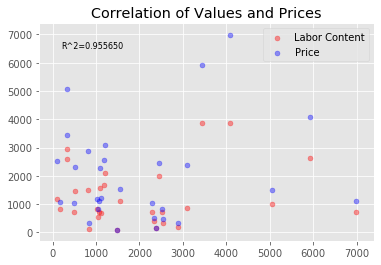

In [1110]:
import matplotlib.pyplot as plt

X=np.sort(O)

with plt.style.context('ggplot'):
    plt.scatter(X,sol, alpha=.4, s=25 ,color='red')
    plt.scatter(X,O, alpha=.4, s=25 ,color='blue')    
    plt.legend(['Labor Content', 'Price'])
    plt.legend(['Labor Content', 'Price'])
    plt.title('Correlation of Values and Prices')
    correlation_matrix = np.corrcoef(sol,pred)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2    
    plt.text(200,6500,'R^2=%5f' % r_squared, fontsize=8)

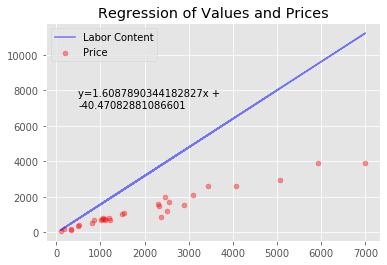

In [1094]:
with plt.style.context('ggplot'):
    plt.scatter(O,sol, alpha=.4, s=25 ,color='red')
    params=model(sol.values,O)
    pred=params[0] + params[1] * O.values
    plt.plot(O,pred ,'blue',alpha=.5)   
    plt.legend(['Labor Content', 'Price'])
    plt.legend(['Labor Content', 'Price', 'R^2='])
    plt.title('Regression of Values and Prices')
    
    correlation_matrix = np.corrcoef(sol,pred)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    r_squared
    
    plt.text(500,7000,'y=%sx + \n%s' % (params[1],params[0]), fontsize=10)

#### Heatmap

## Effect of Standardizing Data on Metrics of Correlation

## Sampling and Bootstrapping 

In [188]:
def most_var_rows(data,n):
    """
    
    Subset n most variable genes
    
    Parameters
    ..........
    
    data: 2D array of float
    n: int, optional 
        Number of rows to return. 
    
    Return
    ..........
    variable_data=2D array of float 
    
    """
    
    # compute accorss columns
    
    rowvar=np.var(data,axis=1)
    # get indices
    
    sort_indices=np.argsort(rowvar)[-n:]
    
    variable_data=data[sort_indices,:]
    
    return variable_data

In [189]:
X_Y=np.c_[sol,O]
sample=most_var_rows(X_Y,10)
correlation_matrix = np.corrcoef(sample[:,0] , sample[:,1] )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9249168848639434

In [1023]:
def bootstrap_ilc(A,O,V,sample_size,boot_iter, ilc_iter):
    
    """ bootstrap sample ILC 
    
    
    
    
    Parameters 
    
    ..........
    
    
    
    Returns
    
    ...........
    
    

    """
    
    R_2=[]
    
    for i in range(boot_iter):
        
        ## random sample of inputs - first level 
        sol=iterative_labor_calculation(A,O,V,ilc_iter)
        X_Y=np.c_[sol,O]
        ## random sample of result - second level 
        random_indexes=np.random.randint(0,10,sample_size)
        random_indexes=np.unique(random_indexes)
        random_sample=X_Y[random_indexes,:]
        correlation_matrix = np.corrcoef(random_sample[:,0] , random_sample[:,1] ) 
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        R_2.append(r_squared)
                
    return np.array(R_2).mean()

In [1025]:
bootstrap_ilc(A,O,V,300,200,6)

0.1454653532019346

## Linear Regression Model and Prediction 

In [1069]:
def model(X,Y):
    X_b=np.c_[np.ones(X.shape),X]
    theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(O)
    return theta 

def predict(x,theta):
    array=np.array(x)
    array_b=np.c_[np.ones(array.shape),array]
    prediction=array_b.dot(theta)
    return prediction

In [1013]:
params=model(sol,O)
params

array([1.37094104e+04, 1.29227228e+00])

In [261]:
pred=predict(sol.values,params)
pred

array([ 12501.66856484,   9329.67752514,  52873.02994307,  20118.11454578,
        16397.02622571,  28715.23853045,  20609.68838945,   6002.85146379,
         4479.41430238,  15677.96581778,  14175.54802271,   9622.94182521,
         3828.90842405,  16894.97682719,  17974.7715752 ,   9621.89937614,
        33882.11984978,   8379.42515112,   5321.56118051,   3442.9438619 ,
        26344.0650878 ,  13880.97162517,  11634.86255714,   3295.74652557,
        29148.9132396 ,  65360.21877634, 108245.06509029,  19285.5454716 ,
        47864.38602604,  20719.45419826])

In [262]:
X_Y=np.c_[pred,O]
sample=most_var_rows(X_Y,10)
correlation_matrix = np.corrcoef(sample[:,0] , sample[:,1] )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared


0.7441053305799552